[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) Someone's favorite color
b) How tall someone is
c) The amount of lanes on the road
d) The speed of the car

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")

Part a. Construct a histogram of CO2 emissions.

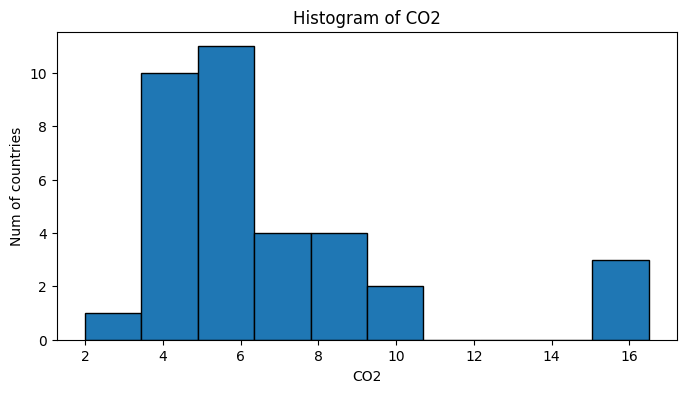

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2')
plt.xlabel("CO2")
plt.ylabel('Num of countries')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [11]:
mean = np.mean(carbon_west['CO2'])
median = np.median(carbon_west['CO2'])
std = np.std(carbon_west['CO2'])
print(f"Mean: {mean}\nMedian: {median}\nStandard Deviation: {std}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [44]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [45]:
withoutDC = murders["murder"][:-1]
mean = np.mean(withoutDC)
std = np.std(withoutDC)
print(f"Mean without D.C {mean}\nStandard deviation without D.C. = {std}")

Mean without D.C 4.874
Standard deviation without D.C. = 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [16]:
minimum = np.min(murders["murder"][:-1])
q1 = np.percentile(murders["murder"][:-1], 25)
median = np.median(murders["murder"][:-1])
q3 = np.percentile(murders["murder"][:-1], 75)
maximum = np.max(murders["murder"][:-1])

print(f"Minimum: {minimum}\nQ1: {q1}\nMedian: {median}\nQ3: {q3}\nMaximum: {maximum}")

Minimum: 1.0
Q1: 2.625
Median: 4.85
Q3: 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [46]:
withDC = murders["murder"]
print(f"The mean was more affected by the outlier than the median.\nAnd the over all range was more affected by the outlier than the IQR")
withDC.describe()

The mean was more affected by the outlier than the median.
And the over all range was more affected by the outlier than the IQR


,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [47]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

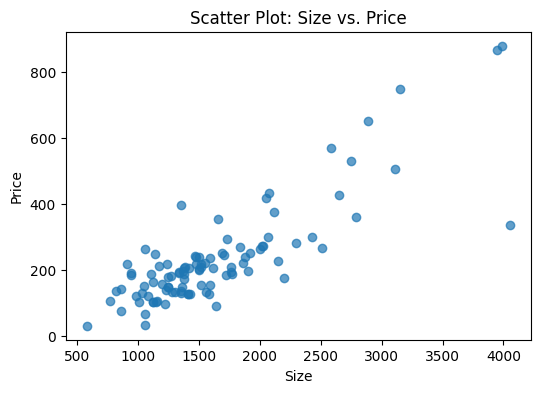

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Part b. Find the correlation between the two variables.

In [29]:
correlation = houses['size'].corr(houses['price'])
print(f"The correlation is: {correlation}")

The correlation is: 0.8337847885586538


Part c. Find and plot the regression line on top of the scatterplot.

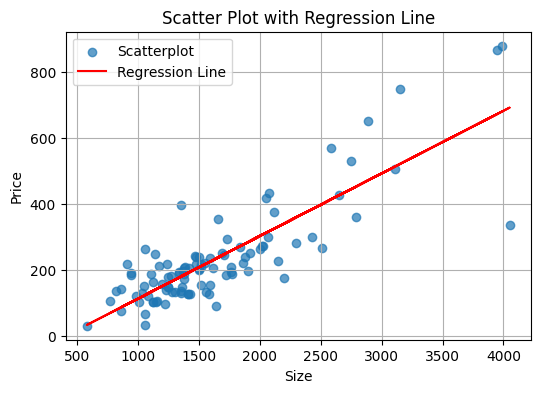

In [37]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7, label='Scatterplot')
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

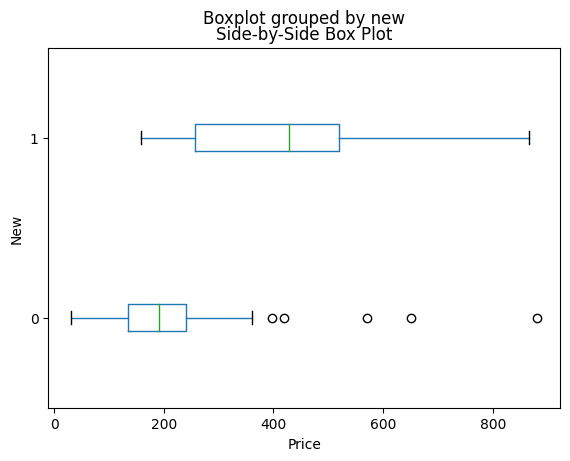

In [38]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

According to the data, there is a positive relationship between the size of a house and the price of it. There is also a positive relationship between whether a house is new and the price, this means that the average new house is more expensive than the average old house.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [48]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [43]:
pd.crosstab(happy["marital"], happy["happiness"], normalize = "index")

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,0.304462,0.000000,0.000000,0.00000,0.56168,0.000000,0.000000,0.000000,0.133858,0.000000,0.000000,0.000000
fem,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mal,0.000000,0.119553,0.036872,0.06257,0.00000,0.255866,0.127374,0.234637,0.000000,0.036872,0.050279,0.075978
male,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
